In [2]:
## note that active directory is already set in the call to import below
## refer to line 37 and line 38 of the function file

from function_file_news_corpus import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
## Read the cleansed filed after preprocessing in 1_Clean_corpus_TFIDF
## regenrate tfidf

news_df = pd.read_pickle('final_clean_hindu_corpus.pkl')
news_df.drop(['DateTime'], axis = 1, inplace = True)
tfidf = TF_IDF(news_df,'text', 30, (1,1))

In [5]:
## get top 1000 words from tfidf


top_1000 = tfidf.nlargest(1000, 'tfidf')
top_1000.drop(['afternoon'], inplace = True)
top_1000.head()
top_1000_dict = top_1000.to_dict(orient="index")

d = {} #  Initialize the new dictionary as an empty dictionary
for k in top_1000_dict:
    d[k] = top_1000_dict[k]['tfidf']


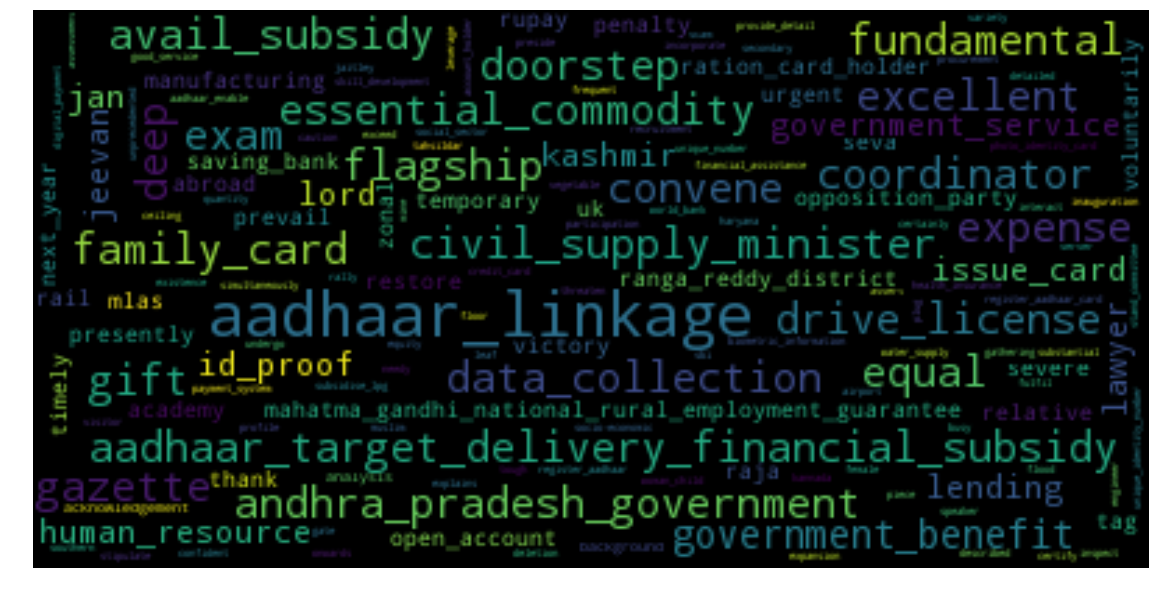

In [6]:
## make word cloud

wordcloud = WordCloud(max_words=1000,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d)
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
